## Inicialización

### Cargar datos

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carga el archivo de datos en un DataFrame
try:
    df = pd.read_csv('vehicles_us.csv')
except: 
    df = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
# imprime la información general/resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


- En la muestra podemos observar valores ausentes en las columnas model_year, cylinders, odometer, paint_color, is_4wd
- Podemos ver que los valores para model_year, date_posted, no estan en el formato correcto.
- Podemos ver en la columna is_4wd, no esta en un formato booleano.
- La columna cylinders no esta en el formato de int.

## Tratar los valores ausentes (si hay)

In [5]:
# Veamos la tabla filtrada con valores ausentes
porcent_table = (df.isna().sum()/len(df) )*100
porcent_table

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

### Empezaremos con la columna is_4wd, donde solo hay el valor True o False

In [6]:
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

Podemos observar que solo se registran valores 1, ya que solo hay dos tipos de valores (1, 0) podemos suponer que los valores faltantes son 0, y los sustituiremos por ese valor

In [7]:
df['is_4wd'] = df['is_4wd'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Podemos observar que ya no tenemos valores ausentes en la columna is_4wd

`creamos un nuevo DataFrame sin valores ausentes, le pasamos la funcion value_counts para saber la frecuencia relativa en cada columna, hacemos lo mismo con el DataFrame con valores ausentes `

In [8]:
#DataFrame sin valores ausentes
df_without_nan = df.dropna()
df_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29916 entries, 2 to 51523
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         29916 non-null  int64  
 1   model_year    29916 non-null  float64
 2   model         29916 non-null  object 
 3   condition     29916 non-null  object 
 4   cylinders     29916 non-null  float64
 5   fuel          29916 non-null  object 
 6   odometer      29916 non-null  float64
 7   transmission  29916 non-null  object 
 8   type          29916 non-null  object 
 9   paint_color   29916 non-null  object 
 10  is_4wd        29916 non-null  float64
 11  date_posted   29916 non-null  object 
 12  days_listed   29916 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 3.2+ MB


### Trabajaremos con los valores ausentes en model_year

Podemos ver que el porcentaje de valores ausentes es del 7.023775%, determinaremos si los valores ausentes presentan un patrón, es decir, si su aparición en el conjunto de datos es aleatoria o no.

In [9]:
# Comprobación de la distribución en model_year
difference_model_year = df_without_nan['model_year'].value_counts(normalize = True) / df['model_year'].value_counts(normalize = True)
print(difference_model_year)
print(difference_model_year.isnull().value_counts())

1908.0    0.800675
1929.0         NaN
1936.0    1.601350
1948.0    1.601350
1949.0         NaN
            ...   
2015.0    0.991748
2016.0    0.996372
2017.0    1.002913
2018.0    1.023024
2019.0    1.002951
Name: model_year, Length: 68, dtype: float64
False    65
True      3
Name: model_year, dtype: int64


Ya que con esta información no podemos sacar conclusiones, buscaremos un patron con la columna model

In [10]:
#Realizamos una tabla dinamica para asociar el model con model_year y asi poder rellenar los valores en los modelos que faltan
table_model_year = df.pivot_table(index = 'model', values = 'model_year', aggfunc = ['median', 'mean'])
model_year_median = df.pivot_table(index = 'model', values = 'model_year', aggfunc = 'median')
table_model_year

,median,mean
,model_year,model_year
model,,
acura tl,2007.0,2007.517857
bmw x5,2010.0,2008.991870
buick enclave,2012.0,2012.194553
cadillac escalade,2009.0,2008.508475
chevrolet camaro,2013.0,2008.397959
...,...,...
toyota sienna,2008.0,2008.584416
toyota tacoma,2010.0,2009.331599


Tomamos los valores de mediana ya que no puede haber numeros de coma flotante para el año y sustituimos los valores ausentes 

In [11]:
# Usaremos una funcion para completar los valores ausentes

def model_year(row):
    model = row['model']
    model_year = row['model_year']
    if pd.isna(model_year):
        return model_year_median['model_year'][model]
    return model_year

In [12]:
#comprobar la funcioncion 
row_values = [np.nan, "ford f-150"]  
row_columns = ['model_year', 'model']
row = pd.Series(data=row_values, index=row_columns)
model_year(row)

2011.0

In [13]:
# Reemplazar los valores ausentes si hay algún error
df['model_year'] = df.apply(model_year, axis=1)

In [14]:
#comprobando los datos en el DataFrame
df.info()
df['model_year'].isnull().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


False    51525
Name: model_year, dtype: int64

### Trabajaremos con los valores ausentes en cylinders

Podemos ver que el porcentaje de valores ausentes es del 10.208637%, determinaremos si los valores ausentes presentan un patrón, es decir, si su aparición en el conjunto de datos es aleatoria o no.

In [15]:
# Comprobación de la distribución en cylinders
difference_cylinders = df_without_nan['cylinders'].value_counts(normalize = True) / df['cylinders'].value_counts(normalize = True)
print(difference_cylinders)

8.0     1.003993
6.0     1.002859
4.0     0.990320
10.0    1.022547
5.0     1.040474
3.0     1.091645
12.0    0.773248
Name: cylinders, dtype: float64


Ya que con esta información no podemos sacar conclusiones, buscaremos un patron con la columna model

In [16]:
table_cylinders = df.pivot_table(index = 'model', values = 'cylinders', aggfunc = ['median', 'mean'])
cylinders_median = df.pivot_table(index = 'model', values = 'cylinders', aggfunc = 'median')
table_cylinders

,median,mean
,cylinders,cylinders
model,,
acura tl,6.0,5.971564
bmw x5,6.0,6.406375
buick enclave,6.0,6.000000
cadillac escalade,8.0,7.986395
chevrolet camaro,6.0,6.887097
...,...,...
toyota sienna,6.0,5.952381
toyota tacoma,6.0,5.345205


Ya que el numero de cilindro depende del modelo del auto, sustituiremos los valores ausentes dependiendo de la mediana del modelo del auto

In [17]:
# Usaremos una funcion para completar los valores ausentes

def cylinders_model(row):
    model = row['model']
    cylinders = row['cylinders']
    if pd.isna(cylinders):
        return cylinders_median['cylinders'][model]
    return cylinders

In [18]:
#comprobar la funcioncion 
row_values = [np.nan, "cadillac escalade"]  
row_columns = ['cylinders', 'model']
row = pd.Series(data=row_values, index=row_columns)
cylinders_model(row)

8.0

In [19]:
# Reemplazar los valores ausentes si hay algún error
df['cylinders'] = df.apply(cylinders_model, axis=1)

In [20]:
#comprobando los datos en el DataFrame
df.info()
df['cylinders'].isnull().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


False    51525
Name: cylinders, dtype: int64

### Trabajaremos con los valores ausentes en odometer

Podemos ver que el porcentaje de valores ausentes es del 15.316836%, determinaremos si los valores ausentes presentan un patrón, es decir, si su aparición en el conjunto de datos es aleatoria o no.

In [21]:
# Comprobación de la distribución en odometer
difference_odometer = df_without_nan['odometer'].value_counts(normalize = True) / df['odometer'].value_counts(normalize = True)
difference_odometer

0.0         1.009136
1.0         1.041798
2.0         0.729259
3.0         1.458517
5.0         1.296460
              ...   
840000.0    0.729259
866000.0    1.458517
920000.0    1.458517
980000.0         NaN
990000.0    0.729259
Name: odometer, Length: 17762, dtype: float64

Con esta información no podemos sacar conclusiones, ya que el Km se puede relacionar con el año en que salio el modelo, buscaremos un patron

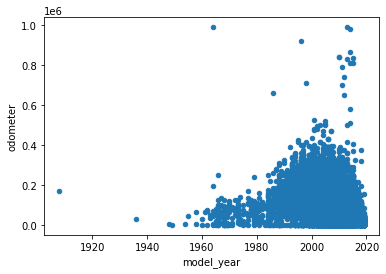

In [22]:
my_plot = df.plot("model_year", "odometer", kind="scatter")

Ya que no hay valores atípicos significativos, aplicaremos la media del año del modelo, para rellenar valores ausentes

In [23]:
odometer_avg = df.pivot_table(index = 'model_year', values = 'odometer')
odometer_avg

,odometer
model_year,
1908.0,169328.000000
1936.0,30000.000000
1948.0,4000.000000
1949.0,1800.000000
1954.0,3565.000000
...,...
2015.0,82503.819348
2016.0,61244.992120
2017.0,47317.910506


In [24]:
# Usaremos una funcion para completar los valores ausentes
def odometer_year(row):
    model_year = row['model_year']
    odometer = row['odometer']
    if pd.isna(odometer):
        return odometer_avg['odometer'][model_year]
    return odometer

In [25]:
#comprobar la funcioncion 
row_values = [np.nan, 2003.0]  
row_columns = ['odometer', 'model_year']
row = pd.Series(data=row_values, index=row_columns)
odometer_year(row)

162071.751023751

`Podemos ver que hay un error en el año 1929`

In [26]:
#lo cambiamos manualmente 
df.loc[df['model_year'] == 1929, 'odometer'] = 30000

In [27]:
# Reemplazar los valores ausentes si hay algún error
df['odometer'] = df.apply(odometer_year, axis=1)

In [28]:
#verificamos la fila
df[df['model_year'] == 1929]
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28


In [29]:
#comprobando los datos en el DataFrame
df.info()
df['odometer'].isnull().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


False    51525
Name: odometer, dtype: int64

### Trabajaremos con los valores ausentes en paint_color

Podemos ver que el porcentaje de valores ausentes es del 17.985444%, determinaremos si los valores ausentes presentan un patrón, es decir, si su aparición en el conjunto de datos es aleatoria o no.

In [30]:
# Comprobación de la distribución en paint_color
difference_paint_color = df_without_nan['paint_color'].value_counts(normalize = True) / df['paint_color'].value_counts(normalize = True)
print(difference_paint_color)

black     0.997530
blue      0.994944
brown     0.984053
custom    1.010718
green     0.961266
grey      0.999193
orange    0.990623
purple    0.983249
red       1.015723
silver    0.997204
white     1.005648
yellow    1.008177
Name: paint_color, dtype: float64


Ya que la diferencia no se aleja de 1, podemos asumir que valores ausentes son del tipo aleatorio
- Los valores ausentes pueden deverse al desconocimiento del color, estos los llenaremos con el valor Other, ya que no hay un patron entre el color del carro y algun otro factor

In [31]:
df['paint_color'] = df['paint_color'].fillna('Other')
df['paint_color'].value_counts()

white     10029
Other      9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [32]:
df.info()
df['paint_color'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


0

### Conclusiones de los valores ausentes 

- En la columna is_4wd, en los valores de tipo booleano solo existen 2 respuestas (0, 1), en el DataFrame solo encontramos el valor 1, eso quiere decir que el valor ausente es 0
- En la columna model_year, se aplico la mediana de cada modelo de auto, ya que la media nos arroja un valor de punto flotante
- En la columna de cylinders, se ocupa la mediana de los cylindros que tiene cada modelo de auto
- En la columna Odometer, buscamos valores atipicos significativos, al no encontrar se ocupo la media de odometer para el modelo de cada año
- En esta coluumna encontramos un error en la columna 1929 y se realizo el cambio manualmente
- En la columna paint_color, los datos ausentes son de tipo aleatorio, los datos ausentes se cambian por Other, ya que no hay un patron para el color y el auto

### Proximos pasos



## Corregir los tipos de datos

### Cambiamos los siguientes tipos de datos
- model_year a fecha
- cylinders a int
- is_4wd a int
- date_posted a fecha 

In [33]:
df['model_year']= pd.to_datetime(df['model_year'], format='%Y')
df['cylinders'] = df['cylinders'].astype('int')
df['is_4wd'] = df['is_4wd'].astype('int')
df['date_posted']= pd.to_datetime(df['date_posted'], format='%Y.%m.%d')

In [34]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  datetime64[ns]
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(6)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011-01-01,bmw x5,good,6,gas,145000.000000,automatic,SUV,Other,1,2018-06-23,19
1,25500,2011-01-01,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50
2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003-01-01,ford f-150,fair,8,gas,162071.751024,automatic,pickup,Other,0,2019-03-22,9
4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013-01-01,nissan maxima,like new,6,gas,88136.000000,automatic,sedan,black,0,2018-10-03,37
51521,2700,2002-01-01,honda civic,salvage,4,gas,181500.000000,automatic,sedan,white,0,2018-11-14,22
51522,3950,2009-01-01,hyundai sonata,excellent,4,gas,128000.000000,automatic,sedan,blue,0,2018-11-15,32
51523,7455,2013-01-01,toyota corolla,good,4,gas,139573.000000,automatic,sedan,black,0,2018-07-02,71


## Enriquecer datos

In [35]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
df['date_end_posted'] = df['date_posted'] + pd.to_timedelta(df['days_listed'], unit='D')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_end_posted
0,9400,2011-01-01,bmw x5,good,6,gas,145000.000000,automatic,SUV,Other,1,2018-06-23,19,2018-07-12
1,25500,2011-01-01,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50,2018-12-08
2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,2019-04-27
3,1500,2003-01-01,ford f-150,fair,8,gas,162071.751024,automatic,pickup,Other,0,2019-03-22,9,2019-03-31
4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,2019-04-30


- agragamos la columna date_end_posted, que nos indica la fecha en que el anuncio fue eliminado 

In [36]:
# Agrega los años del vehículo cuando el anuncio se colocó
df['model_year_posted'] = df['date_posted'].dt.year - df['model_year'].dt.year
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_end_posted,model_year_posted
0,9400,2011-01-01,bmw x5,good,6,gas,145000.000000,automatic,SUV,Other,1,2018-06-23,19,2018-07-12,7
1,25500,2011-01-01,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50,2018-12-08,7
2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,2019-04-27,6
3,1500,2003-01-01,ford f-150,fair,8,gas,162071.751024,automatic,pickup,Other,0,2019-03-22,9,2019-03-31,16
4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,2019-04-30,2


- Agregamos la columna model_year_posted, que nos indica los años que el vehiculo tiene cuando se posteo el anuncio

In [37]:
# Agrega el millaje promedio del vehículo por año
def odometerforyear(row):
    model_year_posted = row['model_year_posted']
    if model_year_posted > 0:
        return row['odometer'] / row['model_year_posted']
    return row['odometer']
#probando la funciòn 
row_values = [0]  
row_columns = ['model_year_posted']
row = pd.Series(data=row_values, index=row_columns)
# Crear una nueva columna basada en la función
df['odometer_for_year'] = df.apply(odometerforyear, axis = 1)
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_end_posted,model_year_posted,odometerforyear
0,9400,2011-01-01,bmw x5,good,6,gas,145000.000000,automatic,SUV,Other,1,2018-06-23,19,2018-07-12,7,20714.285714
1,25500,2011-01-01,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50,2018-12-08,7,12672.142857
2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,2019-04-27,6,18333.333333
3,1500,2003-01-01,ford f-150,fair,8,gas,162071.751024,automatic,pickup,Other,0,2019-03-22,9,2019-03-31,16,10129.484439
4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,2019-04-30,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013-01-01,nissan maxima,like new,6,gas,88136.000000,automatic,sedan,black,0,2018-10-03,37,2018-11-09,5,17627.200000
51521,2700,2002-01-01,honda civic,salvage,4,gas,181500.000000,automatic,sedan,white,0,2018-11-14,22,2018-12-06,16,11343.750000
51522,3950,2009-01-01,hyundai sonata,excellent,4,gas,128000.000000,automatic,sedan,blue,0,2018-11-15,32,2018-12-17,9,14222.222222
51523,7455,2013-01-01,toyota corolla,good,4,gas,139573.000000,automatic,sedan,black,0,2018-07-02,71,2018-09-11,5,27914.600000


- Agregamos la columna odometerforyear, que nos indica el el millaje por año del vehiculo

In [38]:
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [39]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
df.loc[df['condition'] == 'new', 'condition'] = 5
df.loc[df['condition'] == 'like new', 'condition'] = 4
df.loc[df['condition'] == 'excellent', 'condition'] = 3
df.loc[df['condition'] == 'good', 'condition'] = 2
df.loc[df['condition'] == 'fair', 'condition'] = 1
df.loc[df['condition'] == 'salvage', 'condition'] = 0
df['condition'] = df['condition'].astype('int')

- Sustituimos los valores de la columna condition, por valores numericos mas facil de indentificar 
    + new = 5
    + like new = 4
    + excellent = 3
    + good = 2
    + fair = 1
    + salvage = 0

In [40]:
df['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

## Comprobar datos limpios

In [41]:
# imprime la información general/resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  datetime64[ns]
 2   model              51525 non-null  object        
 3   condition          51525 non-null  int64         
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  int64         
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  date_end_posted    51525 non-null  datetime64[ns]
 14  model_

In [42]:
# imprimir una muestra de datos
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_end_posted,model_year_posted,odometerforyear
0,9400,2011-01-01,bmw x5,2,6,gas,145000.000000,automatic,SUV,Other,1,2018-06-23,19,2018-07-12,7,20714.285714
1,25500,2011-01-01,ford f-150,2,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50,2018-12-08,7,12672.142857
2,5500,2013-01-01,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,2019-04-27,6,18333.333333
3,1500,2003-01-01,ford f-150,1,8,gas,162071.751024,automatic,pickup,Other,0,2019-03-22,9,2019-03-31,16,10129.484439
4,14900,2017-01-01,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,2019-04-30,2,40451.500000


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

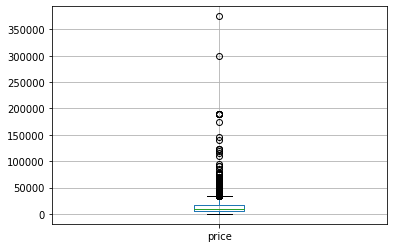

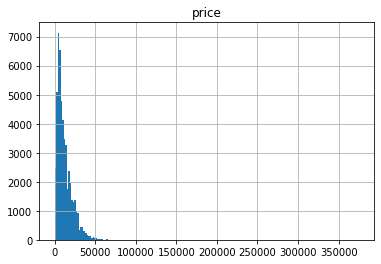

limite superior = 34597.5


In [43]:
df.boxplot('price')
df.hist('price', bins = 200)
plt.show()
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lim_sup_price = Q3_price+1.5*IQR_price
print('limite superior =', lim_sup_price)

- En el diagrama podemos ver que hay precios arriba de 350000 y precios en cero, estos son valores atipicos, recortaremos los valores que no esten entre el 5000 hasta 34597.5

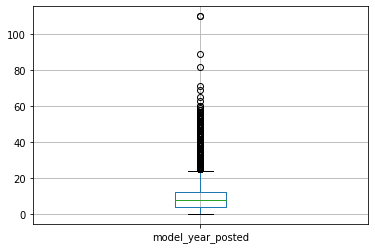

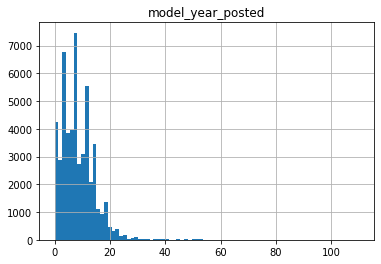

limite superior = 24.0


In [44]:
df.boxplot('model_year_posted')
df.hist('model_year_posted', bins = 80)
plt.show()
Q1_model_year_posted = df['model_year_posted'].quantile(0.25)
Q3_model_year_posted = df['model_year_posted'].quantile(0.75)
IQR_model_year_posted = Q3_model_year_posted - Q1_model_year_posted
lim_sup_model_year_posted = Q3_model_year_posted+1.5*IQR_model_year_posted
print('limite superior =', lim_sup_model_year_posted)

Ya que los autos se pueden vender en condiciones de nuevo, eliminaremos los valores atipicos mayores de 24 años

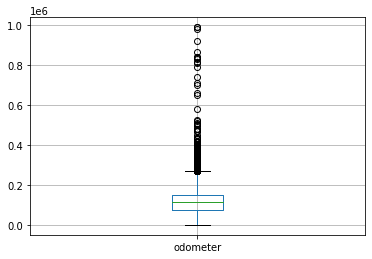

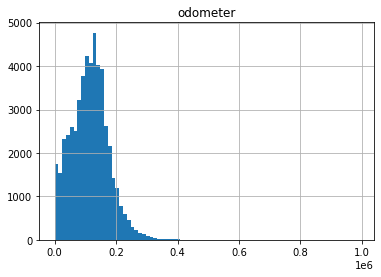

limite superior = 269779.2978173464


In [45]:
df.boxplot('odometer')
df.hist('odometer', bins = 80)
plt.show()
Q1_odometer = df['odometer'].quantile(0.25)
Q3_odometer = df['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
lim_sup_odometer = Q3_odometer+1.5*IQR_odometer
print('limite superior =', lim_sup_odometer)

Podemos observar que los valores atipicos en nuestros datos son los millajes arriba del 269779.2978173464

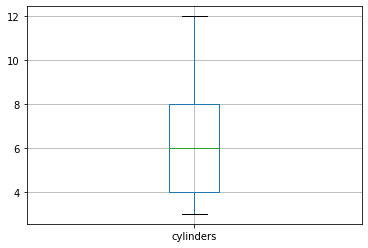

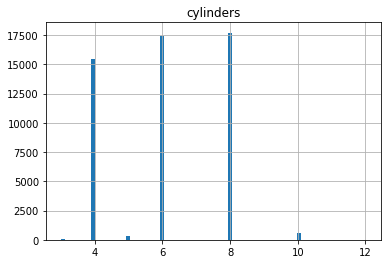

count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [46]:
df.boxplot('cylinders')
df.hist('cylinders', bins = 80)
plt.show()
df['cylinders'].describe()

Ya que el numero de cilindros es un valor estandar del auto y no presenta valores atipicos no los eliminaremos

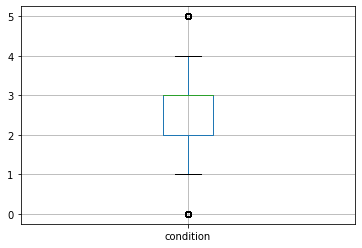

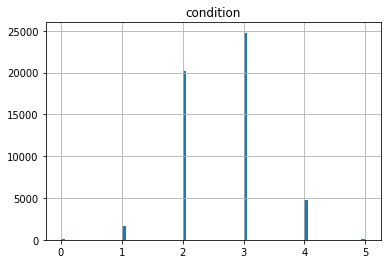

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

In [47]:
df.boxplot('condition')
df.hist('condition', bins = 80)
plt.show()
df['condition'].describe()

Ya que el estado del auto es un valor estandar y no presenta valores atipicos no los eliminaremos

## Estudiar y tratar valores atípicos

In [48]:
# Determinar los límites inferiores para valores atípicos
min_price = 500

In [49]:
# Determina los límites superiores para valores atípicos
max_price = 34597.5
max_model_year_posted = 24
max_odometer = 269779.2978173464

In [50]:
# Almacena los datos sin valores atípicos en un DataFrame separado
data_whitaout= df.query('@min_price<price<@max_price & model_year_posted<@max_model_year_posted & odometer<@max_odometer')
data_whitaout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47242 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              47242 non-null  int64         
 1   model_year         47242 non-null  datetime64[ns]
 2   model              47242 non-null  object        
 3   condition          47242 non-null  int64         
 4   cylinders          47242 non-null  int64         
 5   fuel               47242 non-null  object        
 6   odometer           47242 non-null  float64       
 7   transmission       47242 non-null  object        
 8   type               47242 non-null  object        
 9   paint_color        47242 non-null  object        
 10  is_4wd             47242 non-null  int64         
 11  date_posted        47242 non-null  datetime64[ns]
 12  days_listed        47242 non-null  int64         
 13  date_end_posted    47242 non-null  datetime64[ns]
 14  model_

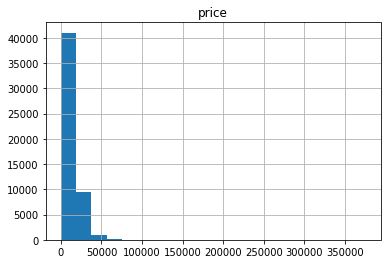

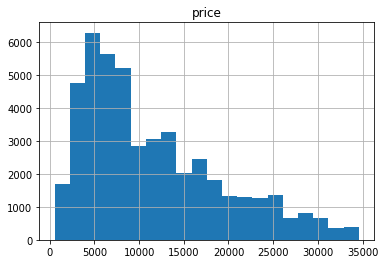

In [51]:
df.hist('price', bins = 20)
data_whitaout.hist('price', bins = 20)
plt.show()

Podemos observar una mejor distribucion de los precion en el DataFrame sin valores atipicos, y con esta informaciòn podemos observar que hay dos picos 4000, 6000 y 8000

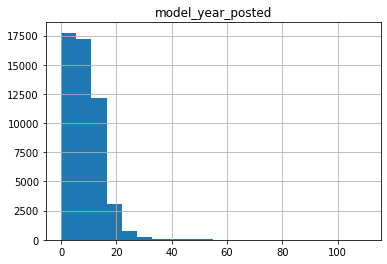

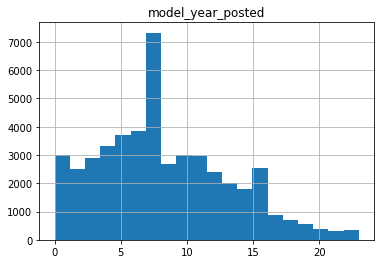

In [52]:
df.hist('model_year_posted', bins = 20)
data_whitaout.hist('model_year_posted', bins = 20)
plt.show()

podemos observar picos en 4, 10 y 12 años que no se logran observar en el histograma con los datos atipicos

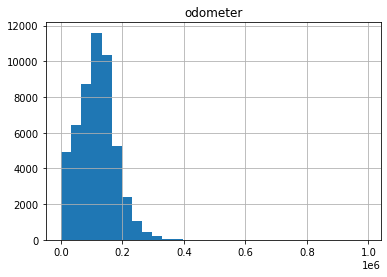

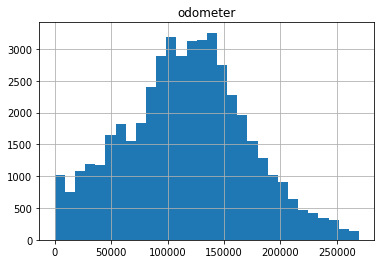

In [53]:
df.hist('odometer', bins = 30)
data_whitaout.hist('odometer', bins = 30)
plt.show()

Podemos observar un pico entre los valores de 100000 y 15000 millas

## Periodo de colocación de los anuncios

count    47242.000000
mean        39.555311
std         28.222771
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


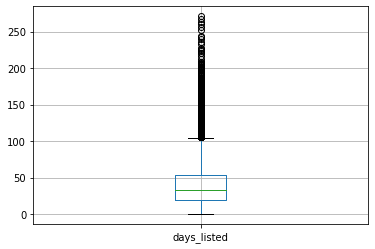

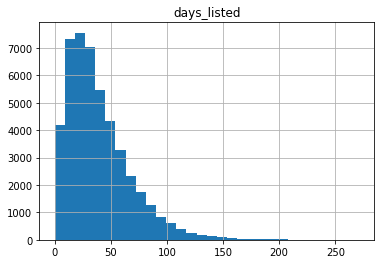

In [54]:
print(data_whitaout['days_listed'].describe())
data_whitaout.boxplot('days_listed')
data_whitaout.hist('days_listed', bins = 30)
plt.show()

Ell tiempo promedio de los dias anunciados es de 40 días, el anuncio mas rapido en eliminarce no duro ni un dia, y el mas prolongado fue de 271 días

## Precio promedio por cada tipo de vehículo

In [55]:
table_type = data_whitaout.pivot_table(index = 'type', values = 'price', aggfunc = ['mean', 'count'])
table_type.columns = ['price_avg', 'anuncios']
table_type

,price_avg,anuncios
type,,
SUV,10732.969647,11597
bus,18107.428571,21
convertible,13481.421212,330
coupe,14101.644410,1932
hatchback,7014.893769,979
mini-van,8072.160245,1142
offroad,14503.261111,180
other,10587.573276,232
pickup,15104.438038,6278


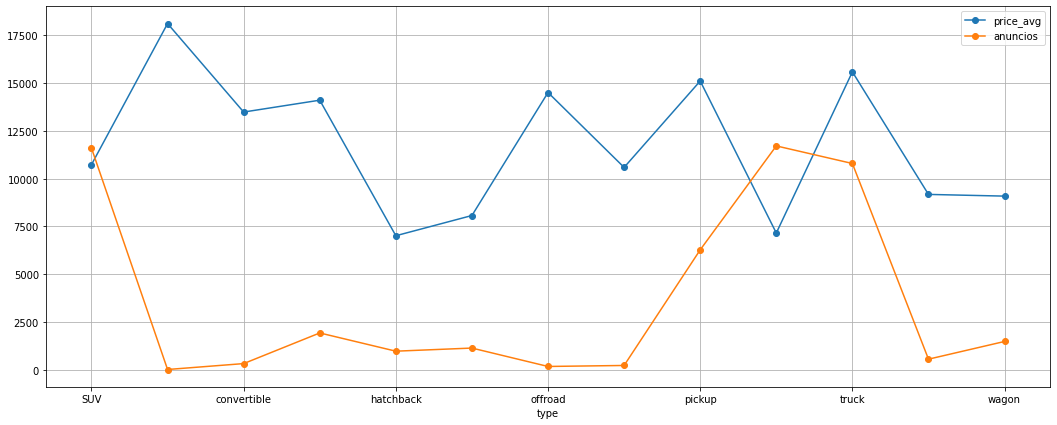

In [56]:
table_type.plot(style = 'o-', figsize = (18, 7), grid = True) 
plt.show()

Podemos observar en el grafico que los tipos de autos con mas anuncios son 'suv' y 'sedan', de igual forma podemos observar el tipo 'Suv' tiene una correlacion mas priesio-anuncio

## Factores de precio

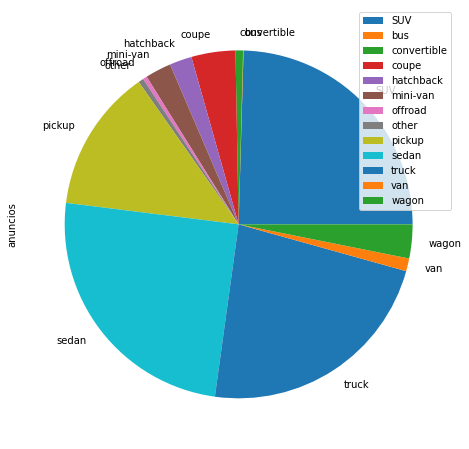

In [57]:
table_type.plot(x = 'type' ,y = 'anuncios', kind = 'pie', figsize = (8, 8))
plt.show()

Como podemos observar en el diagrama, los vehiculos con mayor numero de anuncios son SUV, Sedan, solo analizaremos estos tipos de vehiculos

In [58]:
min_anuncios = table_type.query('anuncios > 11400')
min_anuncios

,price_avg,anuncios
type,,
SUV,10732.969647,11597
sedan,7157.280676,11711


In [59]:
data_whitaout_type = data_whitaout.query('type == ("SUV", "sedan")')
data_whitaout_type

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_end_posted,model_year_posted,odometerforyear
0,9400,2011-01-01,bmw x5,2,6,gas,145000.000000,automatic,SUV,Other,1,2018-06-23,19,2018-07-12,7,20714.285714
2,5500,2013-01-01,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,2019-04-27,6,18333.333333
4,14900,2017-01-01,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,2019-04-30,2,40451.500000
5,14990,2014-01-01,chrysler 300,3,6,gas,57954.000000,automatic,sedan,black,1,2018-06-20,15,2018-07-05,4,14488.500000
6,12990,2015-01-01,toyota camry,3,4,gas,79212.000000,automatic,sedan,white,0,2018-12-27,73,2019-03-10,3,26404.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013-01-01,nissan maxima,4,6,gas,88136.000000,automatic,sedan,black,0,2018-10-03,37,2018-11-09,5,17627.200000
51521,2700,2002-01-01,honda civic,0,4,gas,181500.000000,automatic,sedan,white,0,2018-11-14,22,2018-12-06,16,11343.750000
51522,3950,2009-01-01,hyundai sonata,3,4,gas,128000.000000,automatic,sedan,blue,0,2018-11-15,32,2018-12-17,9,14222.222222
51523,7455,2013-01-01,toyota corolla,2,4,gas,139573.000000,automatic,sedan,black,0,2018-07-02,71,2018-09-11,5,27914.600000


In [60]:
data_whitaout_type['type'].value_counts()

sedan    11711
SUV      11597
Name: type, dtype: int64

Ya que los valores de anuncios son parecidos trabajemos con la relación entre cada uno de ellos con edad, millaje, condición, tipo de transmisión y color.

,price,condition,cylinders,odometer,is_4wd,days_listed,model_year_posted,odometerforyear
price,1.000000,0.277951,0.161262,-0.535192,0.287214,-0.010629,-0.578375,0.257407
condition,0.277951,1.000000,-0.085296,-0.309846,-0.015825,-0.011332,-0.291642,0.066953
cylinders,0.161262,-0.085296,1.000000,0.249123,0.410896,0.010865,0.287634,-0.126785
odometer,-0.535192,-0.309846,0.249123,1.000000,0.099977,0.010558,0.619822,0.019335
is_4wd,0.287214,-0.015825,0.410896,0.099977,1.000000,0.002033,0.118260,-0.037134
days_listed,-0.010629,-0.011332,0.010865,0.010558,0.002033,1.000000,0.010039,-0.008091
model_year_posted,-0.578375,-0.291642,0.287634,0.619822,0.118260,0.010039,1.000000,-0.564590
odometerforyear,0.257407,0.066953,-0.126785,0.019335,-0.037134,-0.008091,-0.564590,1.000000


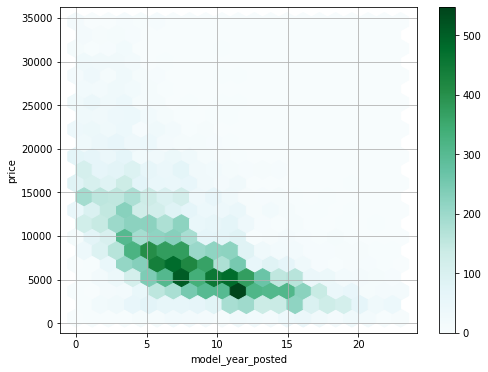

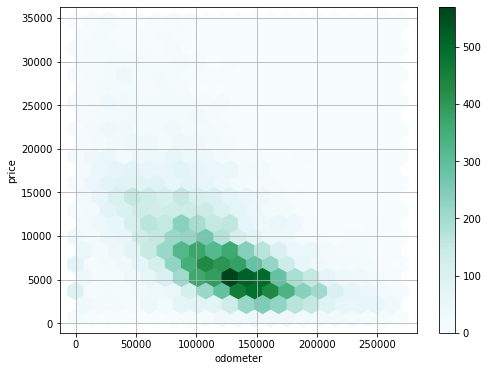

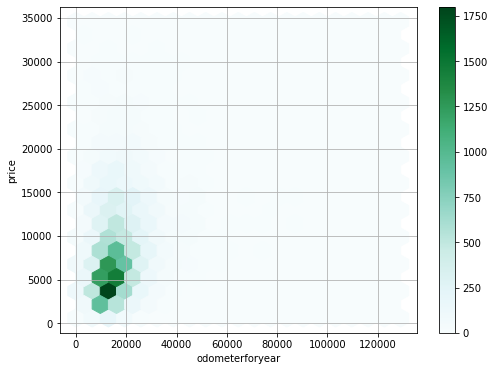

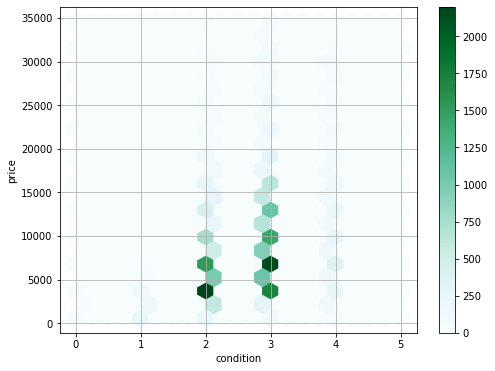

In [61]:
data_whitaout_type.plot(x='model_year_posted', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid = True) 
data_whitaout_type.plot(x='odometer', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid = True)
data_whitaout_type.plot(x='odometerforyear', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid = True)
data_whitaout_type.plot(x='condition', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid = True)
plt.show
data_whitaout_type.corr()

- Podemos observar que la correlación entre precio y edad del vehiculo es -0.57, esto es muy lejano a uno, esto quiere decir que no hay relación, ya que si la edad del vehiculo aumenta, el precio del vehiculo disminuye
- Podemos observar que la correlación entre precio y millaje del vehiculo es -0.53 esto muy lejano a uno, esto quiere decir que no hay relación, esto quiere decir que entre mayor millaje, el precio disminuye
- Podemos observar que la correlación entre precio y condición del vehiculo es 0.27 mas cercano a uno, esto quiere decir que hay relación, y la condición del vehiculo si afecta el precio del mismo
- Podemos observar que la correlación entre precio y millaje por año del vehiculo es 0.25 mas cercano a uno, esto quiere decir que hay relación, el millaje del vehiculo si afecta el precio del mismo, entre menor millaje por año, menor es el precio

### Para la relación de color y tipo de transmisión, usaremos diagramas de cajas con bigote

In [62]:
table_transmission = data_whitaout_type.pivot_table(index = 'transmission', values = 'type', aggfunc = 'count')
table_transmission.columns = ['anuncios']
table_transmission

,anuncios
transmission,
automatic,22119
manual,1022
other,167


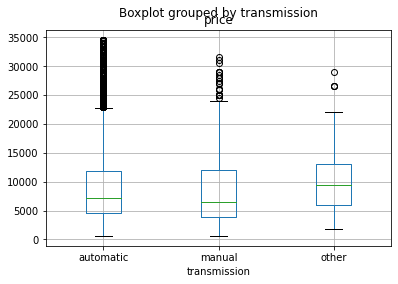

In [63]:
data_whitaout_type.boxplot(column = 'price', by = 'transmission')
plt.show()

- Ya que las tres tipos de transmisión tienen mas de 50 anuncios, se incluyen en el estudio
- En la el diagrama de cajas, podemos observar en el limite superior de los precios no varian demaciado entre el tipo de transmición

In [64]:
table_paint_color = data_whitaout_type.pivot_table(index = 'paint_color', values = 'type', aggfunc = 'count')
table_paint_color.columns = ['anuncios']
table_paint_color

,anuncios
paint_color,
Other,4177
black,3734
blue,2185
brown,605
custom,540
green,607
grey,2722
orange,90
purple,62


Ya que todos los colores tienen mas de 50 anuncios, se incluyen en el estudio

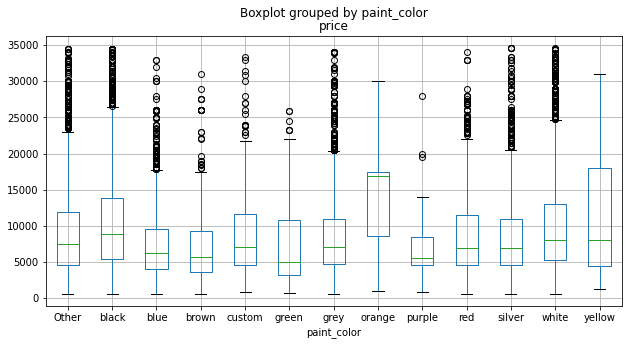

In [65]:
data_whitaout_type.boxplot(column = 'price', by = 'paint_color', figsize = (10, 5))
plt.show()

- En el diagrama de caja, podemos observar que el valor aumenta cuando el auto es color negro, naranja, y amarillo